<p align="left">
  <img src="Fortinitude!.png" alt="Texto Alternativo" width="180" height="180" style="float: left; margin-right: 10px;">
  <span style="font-weight: bold; font-size: 40px;"> Encantadores de Serpente </span> <br>
    <span style= "font-size: 25px;"> Atividade: Modelos 4 </span> <br>
    <span style= "font-style: italic; font-size: 16px;"> Magos: Pedro Kramer e João Pedro </span> <br>
    <span style= "font-style: italic; font-size: 16px;"> Dados: Diamantes Seaborn </span> <br>
    <span style= "text-decoration: underline; font-size: 12px;"> Relatório de Missão! </span> <br>
          
</p>


# Atributos e Target:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import numpy as np
import seaborn as sns
import math

In [2]:
df = sns.load_dataset("diamonds") #Buscando dados
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
#Transformando 'cut' de categórico para numérico

from sklearn.preprocessing import OrdinalEncoder

# Passo 1: só é necessário se os dados tem apenas uma dimensão
# Se seus dados já tem duas dimensões, não precisa fazer isso!
c = df["cut"].values.reshape(-1, 1)

# Passo 2: criar uma instância do encoder
ordem = [["Fair", "Good", "Very Good", "Ideal", "Premium"]] # uma lista para cada coluna
encoder = OrdinalEncoder(categories=ordem)

# Passo 3: ajustar o  aos dados
encoder.fit(c)

# Passo 4: aplicar o encoder usando o método `transform`
dados_convertidos = encoder.transform(c)

#Passo 5: ajustar dimensionalidade do array com itertools
from itertools import chain
flat_dados = list(chain(*dados_convertidos))

#Passo 6: adicionar os dados
df['cut_numbers'] = pd.Series(flat_dados)

df

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_numbers
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,3.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1.0
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3.0
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1.0
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2.0
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,4.0


+ Obs: A claridadade _"clarity"_ e a cor _"color"_, apesar de não parecerem, são categóricos como podemos ver na referência [1] do sns.

In [4]:
#Transformando 'cut' de categórico para numérico

from sklearn.preprocessing import OrdinalEncoder

# Passo 1: só é necessário se os dados tem apenas uma dimensão
# Se seus dados já tem duas dimensões, não precisa fazer isso!
c = df["cut"].values.reshape(-1, 1)

# Passo 2: criar uma instância do encoder
ordem = [["Fair", "Good", "Very Good", "Ideal", "Premium"]] # uma lista para cada coluna
encoder = OrdinalEncoder(categories=ordem)

# Passo 3: ajustar o  aos dados
encoder.fit(c)

# Passo 4: aplicar o encoder usando o método `transform`
dados_convertidos = encoder.transform(c)

#Passo 5: ajustar dimensionalidade do array com itertools
from itertools import chain
flat_dados_1 = list(chain(*dados_convertidos))

#Passo 6: adicionar os dados
df['cut_numbers'] = pd.Series(flat_dados_1)

In [5]:
#Transformando 'clarity' de categórico para numérico

from sklearn.preprocessing import OrdinalEncoder

# Passo 1: só é necessário se os dados tem apenas uma dimensão
# Se seus dados já tem duas dimensões, não precisa fazer isso!
cl = df["clarity"].values.reshape(-1, 1)

# Passo 2: criar uma instância do encoder
ordem = [["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]] # uma lista para cada coluna
encoder = OrdinalEncoder(categories=ordem)

# Passo 3: ajustar o  aos dados
encoder.fit(cl)

# Passo 4: aplicar o encoder usando o método `transform`
dados_convertidos = encoder.transform(cl)

#Passo 5: ajustar dimensionalidade do array com itertools [2]
from itertools import chain
flat_dados_2 = list(chain(*dados_convertidos))

#Passo 6: adicionar os dados
df['clarity_numbers'] = pd.Series(flat_dados_2)

In [6]:
#Transformando 'color' de categórico para numérico

from sklearn.preprocessing import OrdinalEncoder

# Passo 1: só é necessário se os dados tem apenas uma dimensão
# Se seus dados já tem duas dimensões, não precisa fazer isso!
co = df["color"].values.reshape(-1, 1)

# Passo 2: criar uma instância do encoder
ordem = [["J", "I", "H", "G", "F", "E", "D"]] # uma lista para cada coluna
encoder = OrdinalEncoder(categories=ordem)

# Passo 3: ajustar o  aos dados
encoder.fit(co)

# Passo 4: aplicar o encoder usando o método `transform`
dados_convertidos = encoder.transform(co)

#Passo 5: ajustar dimensionalidade do array com itertools [2]
from itertools import chain
flat_dados_3 = list(chain(*dados_convertidos))

#Passo 6: adicionar os dados
df['color_numbers'] = pd.Series(flat_dados_3)
df

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_numbers,clarity_numbers,color_numbers
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,3.0,1.0,5.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4.0,2.0,5.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1.0,4.0,5.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.0,3.0,1.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3.0,2.0,6.0
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1.0,2.0,6.0
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2.0,2.0,6.0
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,4.0,1.0,2.0


In [7]:
#SEPARANDO TREINO E TESTE
from sklearn.model_selection import train_test_split
TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 8088135


df_ind = df.index
indices_treino, indices_teste = train_test_split(
    df_ind, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

#CRIANDO DF DOS TREINOS E TESTE
df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

atributos = ['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity_numbers', 'cut_numbers', 'color_numbers']#Setando atributos
target = ['price']#Setando Target

#SEPARANDO ATRIBUTOS E TARGET
X_treino = df_treino.reindex(atributos, axis=1)
y_treino = df_treino.reindex(target, axis=1)

X_teste = df_teste.reindex(atributos, axis=1)
y_teste = df_teste.reindex(target, axis=1)

#TRANSFORMANDO EM NUMPY
X_treino = X_treino.values
y_treino = y_treino.values.ravel()

X_teste = X_teste.values
y_teste = y_teste.values.ravel()

# Hipótese 1:
_"Mago, normaliza os atributos de imediato! Tal ação elevará a performance dos modelos gerados pelo algoritmo de k-vizinhos mais próximos, conforme decretado pelo soberano!"_

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

+ Não alterarei os hyperparametros, deixarei tudo setado num mesmo, para que a única coisa variando seja a normalização

In [11]:
n_vizinhos = 7

pipeline_kNN = Pipeline([
    ('knn', KNeighborsRegressor(n_neighbors=n_vizinhos)),  # Modelo KNN
])

pipeline_std_kNN = Pipeline([
    ('scaler', StandardScaler()),   # Normalização padrão
    ('knn', KNeighborsRegressor(n_neighbors=n_vizinhos)),  # Modelo KNN
])

pipeline_kNN.fit(X_treino, y_treino)
y_prev_kNN = pipeline_kNN.predict(X_teste)

pipeline_std_kNN.fit(X_treino, y_treino)
y_prev_std_kNN = pipeline_std_kNN.predict(X_teste)

rmse_kNN = np.sqrt(mean_squared_error(y_teste, y_prev_kNN))
rmse_std_kNN = np.sqrt(mean_squared_error(y_teste, y_prev_std_kNN))

print(f'O RMSE do kNN sem normalização padrão foi de {round(rmse_kNN, 2)} dólares, ' 
      f'já o com normalização padrão foi de {round(rmse_std_kNN, 2)} dólares. ' 
      f'A diferença entre o não normalizado e do normalizado então foi de {round(rmse_kNN - rmse_std_kNN, 2)} dólares')

O RMSE do kNN sem normalização padrão foi de 881.42 dólares, já o com normalização padrão foi de 769.72 dólares. A diferença entre o não normalizado e do normalizado então foi de 111.7 dólares


# Hipótese 2:
_"De acordo com a sabedoria ancestral, ordeno que apliqueis a normalização padrão dos atributos, pois isso aprimorará o desempenho dos modelos gerados pelo algoritmo de árvore de decisão. Assim seja feito, em nome da ciência da computação!"_

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

Primeiro, testarei com hiperparâmetros quaisquer

In [13]:
n_folhas = None
n_profundidade = 8
SEMENTE_ALEATORIA = 8088135

pipeline_dt = Pipeline([
    ('dt', DecisionTreeRegressor(max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state = SEMENTE_ALEATORIA)),  # Modelo Decision Tree
])

pipeline_std_dt = Pipeline([
    ('scaler', StandardScaler()),   # Normalização padrão
    ('dt', DecisionTreeRegressor(max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state = SEMENTE_ALEATORIA)),  # Modelo Decision Tree
])

pipeline_dt.fit(X_treino, y_treino)
y_prev_dt = pipeline_dt.predict(X_teste)

pipeline_std_dt.fit(X_treino, y_treino)
y_prev_std_dt = pipeline_std_dt.predict(X_teste)

rmse_dt = np.sqrt(mean_squared_error(y_teste, y_prev_dt))
rmse_std_dt = np.sqrt(mean_squared_error(y_teste, y_prev_std_dt))

print(f'O RMSE da árvore de decisão sem normalização padrão foi de {round(rmse_dt, 2)} dólares,'
      f'já o com normalização padrão foi de {round(rmse_std_dt, 2)} dólares.'
      f'A diferença entre o não normalizado e do normalizado então foi de {round(rmse_dt - rmse_std_dt, 2)} dólares')

O RMSE da árvore de decisão sem normalização padrão foi de 749.12 dólares,já o com normalização padrão foi de 749.12 dólares.A diferença entre o não normalizado e do normalizado então foi de 0.0 dólares


Ao variar os hiperparâmetros para ver se encontrava algum ponto fora da curva, percebi que em um caso a diferença entre os RMSE não era zero, então irei testar vários exemplos e ver como isso se comporta. 

In [14]:
#Fazendo como o senhor professor no módulo 5.2 sobre árvore de decisão
from itertools import product

NUM_FOLHAS = [None, 2, 4, 8, 12, 16, 20, 24, 28, 32]
NUM_PROFUNDIDADE = [None, 3, 4, 5, 6, 7, 8, 9, 10, 12]

lista_diff_hp=[]#Cria uma lista para inserir as difernças.

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    pipeline_dt = Pipeline([
    ('dt', DecisionTreeRegressor(max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state = SEMENTE_ALEATORIA)),  # Modelo Decision Tree
    ])

    pipeline_std_dt = Pipeline([
    ('scaler', StandardScaler()),   # Normalização padrão
    ('dt', DecisionTreeRegressor(max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state = SEMENTE_ALEATORIA)),  # Modelo Decision Tree
    ])
    
    pipeline_dt.fit(X_treino, y_treino)
    y_prev_dt = pipeline_dt.predict(X_teste)

    pipeline_std_dt.fit(X_treino, y_treino)
    y_prev_std_dt = pipeline_std_dt.predict(X_teste)

    rmse_dt = np.sqrt(mean_squared_error(y_teste, y_prev_dt))
    rmse_std_dt = np.sqrt(mean_squared_error(y_teste, y_prev_std_dt))
    lista_diff_hp.append((rmse_dt-rmse_std_dt))

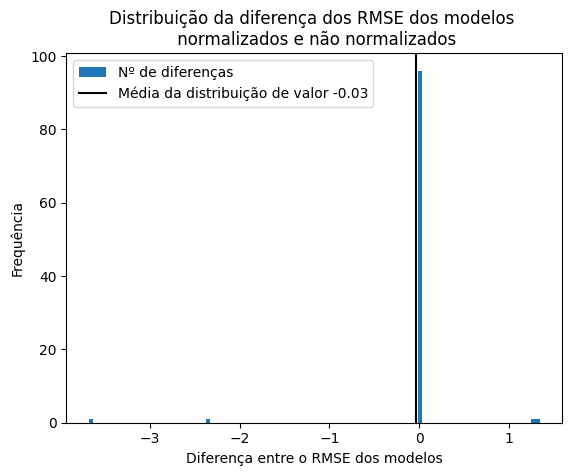

In [15]:
Média = st.mean(lista_diff_hp)

plt.hist(lista_diff_hp, bins=100, label='Nº de diferenças')
plt.title('Distribuição da diferença dos RMSE dos modelos \n normalizados e não normalizados')
plt.axvline(Média, linestyle='-', color='black', label=f'Média da distribuição de valor {round(Média, 2)}')
plt.xlabel('Diferença entre o RMSE dos modelos')
plt.ylabel('Frequência')
plt.legend()

## Comentário sobre as hipóteses

+ Para entender o porquê a normalização pode intervir no desempenho do modelo é necessário entender o que ocorre com os dados ao serem normalizados e como o modelo interpreta isso. 

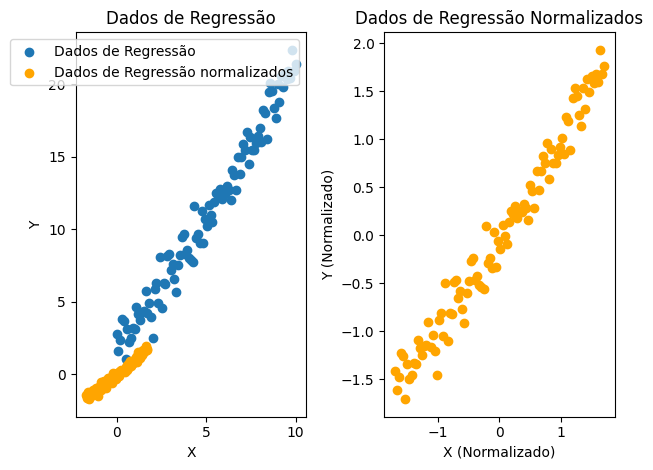

In [16]:
def norm_std(lista):
    '''
    Normaliza uma lista numérica ao subtrair do dado x a média dos dados e dividir pelo desvio padrão
    
    Args:
        lista(list): Uma lista numérica
        
    Return:
        lista_normalizada(list): A lista numérica com valores normalizados desta maneira
    '''
    media = st.mean(lista)
    desvio_padrao = st.stdev(lista)
    lista_normalizada = []
    for item in lista:
        a = (item - media)/desvio_padrao
        lista_normalizada.append(a)
    
    return lista_normalizada

# Gerando dados de entrada (x) e saída (y) para uma regressão simples
np.random.seed(0)
x_regression = np.linspace(0, 10, 100)
y_regression = 2 * x_regression + 1 + np.random.normal(0, 1, 100)

# Primeira imagem: Dados de regressão não normalizados
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeira figura
plt.scatter(x_regression, y_regression, label='Dados de Regressão')
plt.scatter(norm_std(x_regression), norm_std(y_regression), label='Dados de Regressão normalizados',  color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Dados de Regressão')

# Segunda imagem: Dados de regressão normalizados
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segunda figura
plt.scatter(norm_std(x_regression), norm_std(y_regression), label='Dados de Regressão normalizados', color='orange')
plt.xlabel('X (Normalizado)')
plt.ylabel('Y (Normalizado)')
plt.title('Dados de Regressão Normalizados')

plt.tight_layout()  # Garante que os gráficos não se sobreponham
plt.show()

+ Como podemos ver nos dados genéricos acima, apliquei uma normalização padrão num conjunto dados e plotei esses lado a lado, e vemos que a distribuição é a mesma, porém as distâncias não. Isto é, somente a escala muda mas a informação que carrega não. 

+ Contextualizando ao K-NN, esse modelo baseia-se na distância de um certo input dos dados que temos, realizando distância euclidiana dos pontos para ver qual é o valor dos vizinhos e, assim, encontrar quais são os k-vizinhos mais próximos e então retornar uma média desses. Porém, num conjuto de dados, normalmente, os atributos não têm escalas tão parecidas - um exemplo nos diamantes seria o carat que são sempre valores menores que 1 e o atributo table que sempre são de duas casas. A distância entre 0.5 e 64, por exemplo, é grande, e isso pode prejudicar na performance do modelo. Então ao colocar todos atributos numa faixa muito próxima é muito benéfico.

+ Agora a árvore de decisão cria instâncias que separam se menor ou maior que certo valor dos atributos, retornaria como target X, se não cria-se uma nova instância. Então o algoritmo olha para os dados e, a grosso modo, reparte-os em grupos que significam tais valores para target. Uma diferença entre as escalas de cada atributo nesse sentido, não tem interferência, já que o modelo vai pensar apenas no comportamento dos dados e não em suas escalas.

Por fim, a 1º hipótese faz sentido e provou-se que é efetiva, já a segunda nem tanto, como foi mostrado no gráfico plotado na hipótese dois, a maior frequência da diferença da métrica da eficiência dos modelos é 0, ou seja, não há diferenças, os casos soltos onde houve foram, provavelmente, frutos de problemas com float do python e, mesmo assim, de valores na diferença não tão absurdos como sem sequer variar em mais de uma casa.

# Referências
+ [1] https://ggplot2.tidyverse.org/reference/diamonds.html
+ [2] https://docs.python.org/3/library/itertools.html

# Fortinitude!
<img src="https://pages.cnpem.br/MLSchool/wp-content/uploads/sites/143/2023/05/logo-ilum.png" alt="ILUM">